In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from sklearn.preprocessing import minmax_scale
import sklearn.preprocessing as preprocessing
import math

In [ ]:
# Create noisy data
# x_data = np.linspace(-10, 10, num=1000)

stimulusResponsePairCount = 25

x = []
t = 0
for i in range(stimulusResponsePairCount):
  z = []
  for j in range(1):
    z.append(t)
  x.append(z)
  t = t + 1
x = np.asarray(x)

x_data = x
y_data = np.random.randint(256, size=stimulusResponsePairCount)
x_data = minmax_scale(x_data, feature_range=(0,1))
y_data = minmax_scale(y_data, feature_range=(0,1))


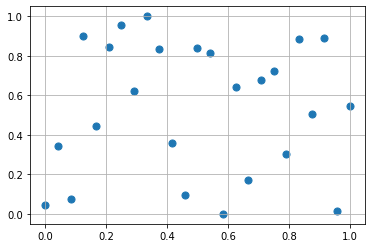

In [ ]:
# Display the dataset
plt.scatter(x_data, y_data, s=50)
plt.grid()
plt.show()

In [ ]:
def loss(x, y):
    return abs(x - y)

In [ ]:
# Create the model 
model = keras.Sequential()
model.add(keras.layers.Dense(units = 1, activation = 'linear', input_shape=[1]))
model.add(keras.layers.Dense(units = 128, activation = 'relu'))
model.add(keras.layers.Dense(units = 128, activation = 'relu'))
model.add(keras.layers.Dense(units = 128, activation = 'relu'))
model.add(keras.layers.Dense(units = 1, activation = 'linear'))

model.compile(loss="mse", optimizer="adam")

# Display the model
model.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_145 (Dense)           (None, 1)                 2         
                                                                 
 dense_146 (Dense)           (None, 128)               256       
                                                                 
 dense_147 (Dense)           (None, 128)               16512     
                                                                 
 dense_148 (Dense)           (None, 128)               16512     
                                                                 
 dense_149 (Dense)           (None, 1)                 129       
                                                                 
Total params: 33,411
Trainable params: 33,411
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit( x_data, y_data, epochs=2000, verbose=1, batch_size=100)

Epoch 1/2000
1/1 [==============================] - 0s 461ms/step - loss: 0.3712
Epoch 2/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.3311
Epoch 3/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.2945
Epoch 4/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.2614
Epoch 5/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.2321
Epoch 6/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.2058
Epoch 7/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.1833
Epoch 8/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.1653
Epoch 9/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.1526
Epoch 10/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.1461
Epoch 11/2000
1/1 [==============================] - 0s 12ms/step - loss: 0.1455
Epoch 12/2000
1/1 [==============================] - 0s 13ms/step - loss: 0.1495
Epoch 13/2000
1/1 [=========================

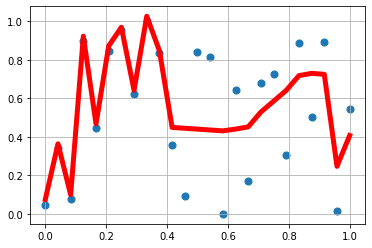

In [ ]:
# Compute the output 
y_predicted = model.predict(x_data)

# Display the result
plt.scatter(x_data, y_data, s=50)
plt.plot(x_data, y_predicted, 'r', linewidth=5)
plt.grid()
plt.show()